In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=63, input_shape=[63]),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(units=128, activation='relu'),
#     tf.keras.layers.Dense(units=256, activation='relu'),
#     tf.keras.layers.Dense(units=512, activation='relu'),
#     tf.keras.layers.Dense(units=512, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(units=256, activation='relu'),
#     tf.keras.layers.Dense(units=128, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(units=64, activation='relu'),
#     tf.keras.layers.Dense(units=24, activation='softmax')
# ])

# model.summary()

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 128)               5504      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               1

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
440/443 [============================>.] - ETA: 0s - loss: 1.5764 - accuracy: 0.5122
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 10s 19ms/step - loss: 1.5709 - accuracy: 0.5138 - val_loss: 0.4888 - val_accuracy: 0.8387
Epoch 2/1000
441/443 [============================>.] - ETA: 0s - loss: 0.6375 - accuracy: 0.7973
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 8s 18ms/step - loss: 0.6368 - accuracy: 0.7975 - val_loss: 0.2907 - val_accuracy: 0.9235
Epoch 3/1000
442/443 [============================>.] - ETA: 0s - loss: 0.4512 - accuracy: 0.8652
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 8s 19ms/step - loss: 0.4511 - accuracy: 0.8652 - val_loss: 0.2560 - val_accuracy: 0.9237
Epoch 4/1000
440/443 [============================>.] - ETA: 0s - loss: 0.3782 - 

Epoch 28/1000
442/443 [============================>.] - ETA: 0s - loss: 0.1604 - accuracy: 0.9526
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 14s 31ms/step - loss: 0.1603 - accuracy: 0.9527 - val_loss: 0.1240 - val_accuracy: 0.9621
Epoch 29/1000
442/443 [============================>.] - ETA: 0s - loss: 0.1603 - accuracy: 0.9522
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 11s 24ms/step - loss: 0.1607 - accuracy: 0.9521 - val_loss: 0.1179 - val_accuracy: 0.9658
Epoch 30/1000
442/443 [============================>.] - ETA: 0s - loss: 0.1573 - accuracy: 0.9524
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 10s 22ms/step - loss: 0.1575 - accuracy: 0.9524 - val_loss: 0.1128 - val_accuracy: 0.9690
Epoch 31/1000
442/443 [============================>.] - ETA: 0s - loss: 

443/443 [==============================] - 12s 27ms/step - loss: 0.1231 - accuracy: 0.9623 - val_loss: 0.1352 - val_accuracy: 0.9581
Epoch 55/1000
443/443 [==============================] - ETA: 0s - loss: 0.1232 - accuracy: 0.9625
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 13s 29ms/step - loss: 0.1232 - accuracy: 0.9625 - val_loss: 0.0843 - val_accuracy: 0.9761
Epoch 56/1000
442/443 [============================>.] - ETA: 0s - loss: 0.1218 - accuracy: 0.9637
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 12s 28ms/step - loss: 0.1218 - accuracy: 0.9636 - val_loss: 0.1226 - val_accuracy: 0.9648
Epoch 57/1000
442/443 [============================>.] - ETA: 0s - loss: 0.1219 - accuracy: 0.9635
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 14s 31ms/step - loss: 0.1219 -

442/443 [============================>.] - ETA: 0s - loss: 0.1055 - accuracy: 0.9676
Epoch 81: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 18s 42ms/step - loss: 0.1056 - accuracy: 0.9676 - val_loss: 0.1268 - val_accuracy: 0.9612
Epoch 82/1000
443/443 [==============================] - ETA: 0s - loss: 0.1019 - accuracy: 0.9685
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 23s 51ms/step - loss: 0.1019 - accuracy: 0.9685 - val_loss: 0.1841 - val_accuracy: 0.9450
Epoch 83/1000
442/443 [============================>.] - ETA: 0s - loss: 0.1049 - accuracy: 0.9678
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
443/443 [==============================] - 21s 47ms/step - loss: 0.1049 - accuracy: 0.9678 - val_loss: 0.0890 - val_accuracy: 0.9725
Epoch 84/1000
443/443 [==============================] - ETA: 0s - loss: 0.1030 - accur

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

148/148 [==============================] - 1s 8ms/step - loss: 0.0997 - accuracy: 0.9707


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 244ms/step
[3.4761797e-20 1.2645896e-23 1.9309400e-24 9.2413648e-29 6.0591600e-20
 1.6693855e-27 6.0857545e-27 1.2240656e-23 4.4999742e-18 7.5089166e-19
 1.4969837e-24 1.5245961e-14 9.4989554e-07 9.9999905e-01 6.0167564e-35
 5.0467368e-17 1.2627822e-15 9.0548609e-33 6.9205865e-23 2.0398773e-15
 2.7868931e-24 2.1049734e-13 1.9851917e-19 1.7302316e-22 2.3192133e-14
 2.2722009e-10]
13


# Confusion matrix

591/591 [==============================] - 3s 5ms/step


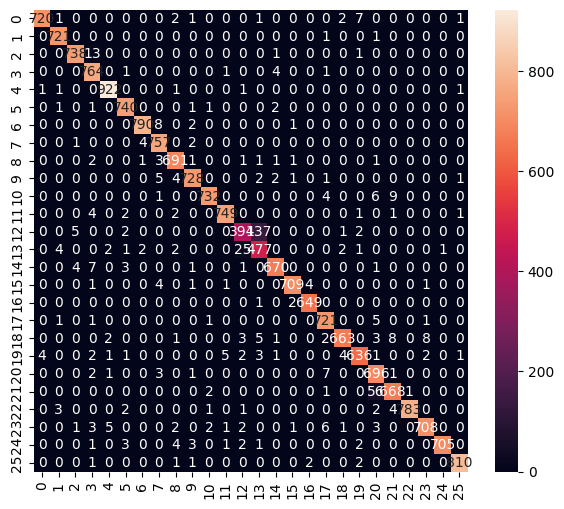

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       735
           1       0.98      1.00      0.99       723
           2       0.99      0.98      0.98       753
           3       0.95      0.99      0.97       771
           4       0.99      0.99      0.99       927
           5       0.98      0.99      0.99       746
           6       0.99      0.99      0.99       801
           7       0.97      0.99      0.98       764
           8       0.97      0.98      0.98       703
           9       0.98      0.98      0.98       744
          10       0.99      0.97      0.98       752
          11       0.99      0.99      0.99       760
          12       0.91      0.73      0.81       541
          13       0.76      0.92      0.83       517
          14       0.98      0.98      0.98       687
          15       0.99      0.98      0.99       721
          16       0.99      1.00      0.99       652
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\MOHAME~1\AppData\Local\Temp\tmpitak05mo\assets


INFO:tensorflow:Assets written to: C:\Users\MOHAME~1\AppData\Local\Temp\tmpitak05mo\assets


609224

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 209 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.02432496e-21 3.34566880e-25 3.92274829e-26 2.62287509e-30
 5.61101570e-21 4.26123195e-29 1.36846663e-28 3.64374803e-25
 6.93175337e-19 1.08446067e-19 6.14306879e-26 2.56583347e-15
 3.92807152e-07 9.99999642e-01 7.10349132e-37 5.80488222e-18
 1.64149691e-16 1.37876407e-34 6.50022293e-24 4.78934610e-16
 1.33470458e-25 3.98494951e-14 1.18488324e-20 1.25876665e-23
 5.04639868e-15 7.87444970e-11]
13
